## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

### 作業1

In [60]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [61]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
target_wine = pd.DataFrame(wine.target, columns=['Target'])

In [62]:
# separate the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_wine, target_wine, test_size=0.3,  random_state=100)


# new a series Random Forest Classifier to compare the performance under different hyperparameters
rfc_1 = RandomForestClassifier(n_estimators=10, random_state=15)
rfc_2 = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=15)
rfc_3 = RandomForestClassifier(n_estimators=10, min_samples_split=5, random_state=15)
rfc_4 = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, random_state=15)

# train model
rfc_1.fit(x_train, y_train)
rfc_2.fit(x_train, y_train)
rfc_3.fit(x_train, y_train)
rfc_4.fit(x_train, y_train)

# predict
y_pred_1 = rfc_1.predict(x_test)
y_pred_2 = rfc_2.predict(x_test)
y_pred_3 = rfc_3.predict(x_test)
y_pred_4 = rfc_4.predict(x_test)


In [63]:
# evaluate the performance by accuracy score
print('model 1 accuracy score %.2f ' % accuracy_score(y_test,y_pred_1))
print('model 2 accuracy score %.2f ' % accuracy_score(y_test,y_pred_2))
print('model 3 accuracy score %.2f ' % accuracy_score(y_test,y_pred_3))
print('model 4 accuracy score %.2f ' % accuracy_score(y_test,y_pred_4))

model 1 accuracy score 0.96 
model 2 accuracy score 0.96 
model 3 accuracy score 0.94 
model 4 accuracy score 0.96 


### 作業2

In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#features in df
df_boston = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
target_boston = pd.DataFrame(raw_df.values[1::2, 2])

df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']

target_boston.columns = ['MEDV']

In [65]:
# separate the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_boston, target_boston, test_size = 0.2, random_state=6)

# new a Random Forest Regressor
rfr = RandomForestRegressor(random_state=6)

# train the model with training data
rfr.fit(x_train, y_train)

# test the predicition with testing data
y_pred = rfr.predict(x_test)



In [66]:
#evaluate the performance by MSE
mse =mean_squared_error(y_test, y_pred)
print(f'Accurarcy: {mse}')

Accurarcy: 12.971544509803925


### Compare with Linear Regression model

In [68]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# separate the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_boston, target_boston, test_size = 0.2, random_state=6)

# new a Linear Regression model
regr = linear_model.LinearRegression()

# train the model with training data
regr.fit(x_train, y_train)

# test the predicition with testing data
y_pred = regr.predict(x_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 27.22


## Conclusion

1. The MSE of Random Forest model is **smaller** than the MSE of Linear Regression model
2. In this case, the performance of Random Forest is better than Linear Regression

#### The feature importance of Random Forest

In [69]:
for feat, importance in zip(rfr.feature_names_in_, rfr.feature_importances_):
    print(f'feature : {feat}, importance : {importance}')

feature : CRIM, importance : 0.032663861405546106
feature : ZN, importance : 0.0015504009693512928
feature : INDUS, importance : 0.005906765177580984
feature : CHAS, importance : 0.0009472645961423127
feature : NOX, importance : 0.017832018810158865
feature : RM, importance : 0.5116715906775404
feature : AGE, importance : 0.01643868615830965
feature : DIS, importance : 0.05732566858396447
feature : RAD, importance : 0.004484142740899054
feature : TAX, importance : 0.017848842083284133
feature : PTRATIO, importance : 0.01410515047804453
feature : B, importance : 0.012996146493513551
feature : LSTAT, importance : 0.3062294618256649


In [70]:
feature_array = rfr.feature_importances_
indices = np.argsort(feature_array)

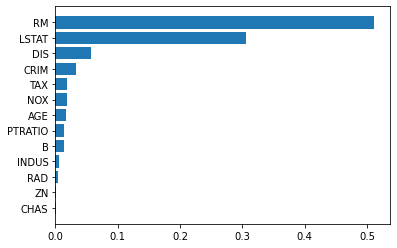

In [71]:
fig, ax = plt.subplots()
ax.barh(range(len(feature_array)), feature_array[indices])
ax.set_yticks(range(len(feature_array)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])